>>[Exponencial, serie alternante (serieEn)](#scrollTo=ifkkjBLv1XCU)

>>[Cancelación sustractiva](#scrollTo=ifkkjBLv1XCU)

>[Solucion](#scrollTo=f3I3tL9RzEpz)

>>[Parte 1](#scrollTo=IT4Kx1xf0Zo8)

>>[Parte 2](#scrollTo=8BurIilI0lAK)



<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab05_errores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Exponencial, serie alternante (serieEn)
Objetivo: Analizar el uso de la cancelación substractiva


Copia textual del libro  [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

- Write a program that calculates $e^{-x}$ 

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}


- Calculate your series for $x \le 1$ and compare it to the built-in function
exp(x) (you may assume that the built-in exponential function is exact).
You should pick an N for which the next term in the series is no more
than $10^{-7}$ of the sum up to that point

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}

- Examine the terms in the series for $x\approx 10$ and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation
at $n \approx x − 1$.

- See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff errors

- By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges

- Make a series of graphs of the error versus N for different values of x.


## Cancelación sustractiva



**serieSn**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

- 
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1} 
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$
- Estudiar la convergencia de la serie para los tres casos.
- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función 
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.
- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página 
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)




#Solucion

##Parte 1

- Write a program that calculates $e^{-x}$ 

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}


In [ ]:
#veamos primero si podemos hacerlo por medio de ciclios, y luego la idea es hacerlo de fomra vectorial

#la idea es que el valor de N sea ingresado o determinado por le usuario

In [ ]:
#construimos un vector que contenga los elementos internos de la sumatoria
#vamos a tomar como ejemplo un valor de N igual a 10 --> luego lo generalizaremos
#tomamos un valor de x = 20  --> luego lo generalizamos

import numpy as np

N= np.arange(5)
signo = (-1) ** N
x= 0.5
term_x = x**N
factorial = np.zeros(len(N))

for i in N:
  fact = np.math.factorial(i)
  factorial[i]= fact

In [ ]:
#generamos el vector general para luego hacer la sumatoria

vect_exp = signo * term_x / factorial
exp = vect_exp.sum() 

exp, np.exp(-0.5)

(0.6067708333333333, 0.6065306597126334)

In [ ]:
#definimos como funcion

def exponencial(x, N):
  n= np.arange(N)
  signo = (-1) ** n
  term_x = [x**n for n in [p for p in range(N)]]      #lo hacemos de esta forma, ya que como un array, cada vector no puede almacenar muchos elementos
  factorial = np.zeros(len(n))

  for i in n:
    fact = np.math.factorial(i)
    factorial[i]= fact

  vect_exp = signo * np.array(term_x) / factorial
  exp = vect_exp.sum() 

  return exp

In [ ]:
np.arange(5)[:-1]

array([0, 1, 2, 3])

In [ ]:
exponencial(10, 100), np.exp(-10)

(4.539992943405317e-05, 4.5399929762484854e-05)

- Calculate your series for $x \le 1$ and compare it to the built-in function
exp(x) (you may assume that the built-in exponential function is exact).
You should pick an N for which the next term in the series is no more
than $10^{-7}$ of the sum up to that point

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}


In [ ]:
#veamos ahora el valor de n que debemos elegir

x= 0.5  #partimos de definir un valor para x

#vamos a comenzar revisando para un valor de N = 0, y vamos a mirar el valor de N mínimo que necesitar
N= 0 

n_siguiente = abs((-x) ** (N+1) / np.math.factorial((N+1)))
limite = abs(10 ** (-7)  * exponencial(x, N))

while (n_siguiente <= limite) == False:
  N += 1
  n_siguiente = abs((-x) ** (N+1) / np.math.factorial((N+1)))
  limite = abs(10 ** (-7)  * exponencial(x, N))

print(f'EL número N es: {N}')

EL número N es: 8


- Examine the terms in the series for $x\approx 10$ and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation
at $n \approx x − 1$.

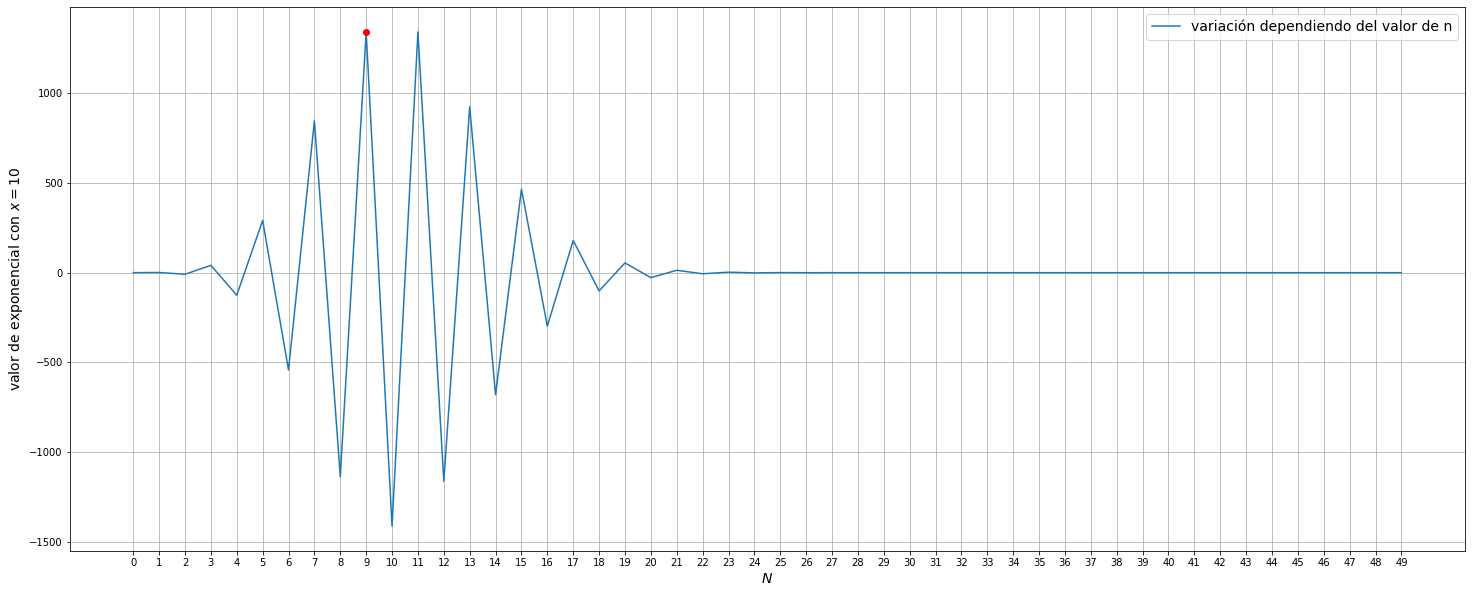

In [ ]:
import matplotlib.pyplot as plt


x=10

valores = np.zeros(50)
n = np.arange(50)

for i in n:
  valores[i] = exponencial(x, i)

plt.figure(figsize= (25,10))
plt.grid()
plt.plot(n, valores, label= 'variación dependiendo del valor de n')
plt.plot(n[x-1], valores[x-1], 'ro')
plt.xlabel('$N$', fontsize= 14)
plt.ylabel('valor de exponencial con $x= 10$', fontsize= 14)
plt.legend(fontsize= 14)
plt.xticks(n);

In [ ]:
valores.max(),  np.where(valores ==valores.max()), valores[49]

(1342.5873015873015, (array([ 9, 11]),), 4.53999294477454e-05)

A partir del gráfico, observamos que cuando $n=x-1= 9$, es decir, el valor que nos piden para analizar una apropiada cancelacion corresponde a la mayor desviación positiva con respecto al resultado que se espera, de hecho, es mucho mayor que el valor esperado

- See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff errors

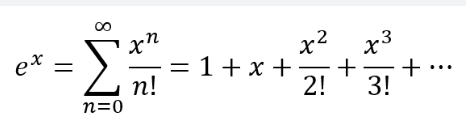

In [ ]:
#definamos ahora la funcion exponencial, pero que no calcule el valor de exp(-x), sino el de exp(x)

def exp_normal(x, N):
  n= np.arange(N)
  term_x = [x**n for n in [p for p in range(N)]]
  factorial = np.zeros(len(n))

  for i in n:
    fact = np.math.factorial(i)
    factorial[i]= fact

  vect_exp = np.array(term_x) / factorial
  exp = vect_exp.sum() 

  return (1/exp)

In [ ]:
exponencial(0.5, 100), exp_normal(0.5, 100), (exponencial(100, 100) - exp_normal(0.5, 100))

(0.6065306597126334, 0.6065306597126335, -5.37097871746855e+41)

In [ ]:
exponencial(3, 100) - np.exp(-3),np.exp(-100) -exponencial(100, 100)

(4.163336342344337e-17, 5.37097871746855e+41)

<ipython-input-121-433a405e3770>:15: RuntimeWarning: divide by zero encountered in double_scalars
  return (1/exp)


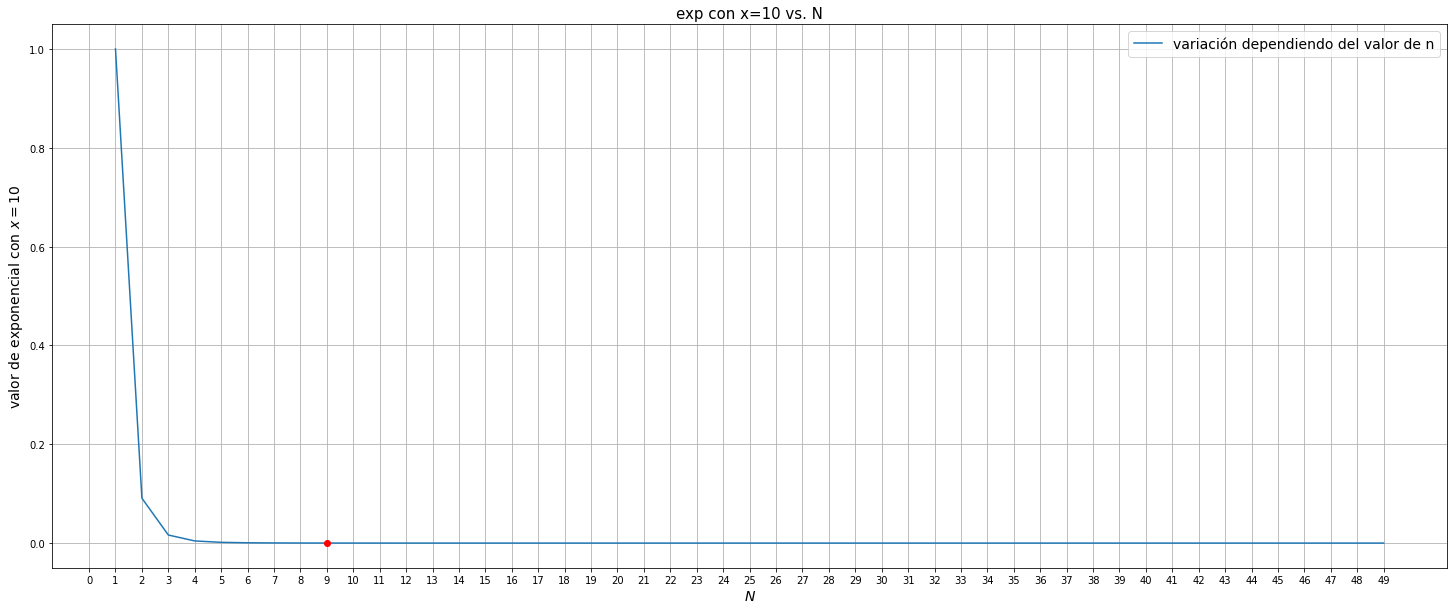

In [ ]:
import matplotlib.pyplot as plt


x=10

valores = np.zeros(50)
n = np.arange(50)

for i in n:
  valores[i] = exp_normal(x, i)

plt.figure(figsize= (25,10))
plt.grid()
plt.plot(n, valores, label= 'variación dependiendo del valor de n')
plt.plot(n[x-1], valores[x-1], 'ro')
plt.xlabel('$N$', fontsize= 14)
plt.ylabel('valor de exponencial con $x= 10$', fontsize= 14)
plt.title('exp con x=10 vs. N', fontsize=15)
plt.legend(fontsize= 14)
plt.xticks(n);

- By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges


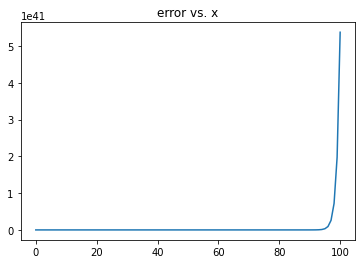

In [ ]:
#veamos una comparacion de los valores que obtenemos para diferentes valores de x, considerando un valor de N fijo

mi_funcion= np.array([exponencial(i, 100) for i in range(101)])
func_numpy= np.array([np.exp(-i) for i in range(101)])
eje_x= np.arange(101)

error_diferencia= func_numpy - mi_funcion

plt.plot(eje_x, error_diferencia)
plt.title('error vs. x');


- Make a series of graphs of the error versus N for different values of x.


el mayor error se encuentra cuando x= 10


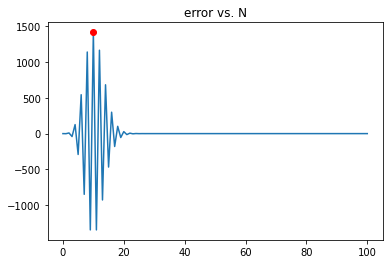

In [ ]:
mi_funcion= np.array([exponencial(10, i) for i in range(101)])
func_numpy= np.array([np.exp(-10) for i in range(101)])
eje_x= np.arange(101)

error_diferencia= func_numpy - mi_funcion
np.max(error_diferencia)

plt.plot(eje_x, error_diferencia)
plt.plot(np.where( error_diferencia == np.max(error_diferencia)), np.max(error_diferencia),  'ro')
plt.title('error vs. N')
mayor_error= (np.where( error_diferencia == np.max(error_diferencia)));   #este es el error mas grande
print(f'el mayor error se encuentra cuando x= {mayor_error[0][0]}')

##Parte 2


**serieSn**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

- 
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1} 
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}

Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def s_n_1(n):

  #vamos a realizarlo de forma vectorial, por lo cual vamos a considerar cada uno de los elementos antes de realizar la sumatoria
  n_vect = np.arange(1, 2*n + 1)            #un vector que va desde el 1 hasta el valor indicado en saltos de a 1 
  signo = (-1) ** n_vect
  n_pls = n_vect + 1          #la ventaja de hacerlo es vectorialmente, es que por ejemplo en este caso, el 1 se suma a cada uno de los elementos del vector  --> no es necesario sumar vector con vector

  s_n = (signo * n_vect / n_pls).sum()

  return s_n, (signo * n_vect / n_pls)[-1], (signo * n_vect / n_pls)[-2]

In [ ]:
s_n_1(3)   #valor de prueba

(0.2404761904761904, 0.8571428571428571, -0.8333333333333334)

In [ ]:
def s_n_2(n):

  #en este caso, el prblema se divide en dos sumatorias

  #obtenemos vectorialmente los términos de cada una de las sumatorias
  n_vect = np.arange(1, n +1)
  
  #primera 
  num = 2 * n_vect - 1
  denm = 2 * n_vect

  #segunda 
  denm_2 = 2 * n_vect + 1

  term_1 = (num / denm).sum()
  term_2 = (denm / denm_2).sum()

  s_n = -term_1 + term_2

  return s_n, -(num / denm)[-1] + (denm / denm_2)[-1], -(num / denm)[-2] + (denm / denm_2)[-2]

In [ ]:
s_n_2(3)

(0.2404761904761905, 0.023809523809523725, 0.050000000000000044)

In [ ]:
def s_n_3(n):
  n_vect = np.arange(1, n+1)

  s_n = (1 / (2* n_vect * (2*n_vect + 1))).sum()

  return s_n, 1 / (2* n_vect * (2*n_vect + 1))[-1], 1 / (2* n_vect * (2*n_vect + 1))[-2]

In [ ]:
s_n_3(3)

(0.24047619047619048, 0.023809523809523808, 0.05)

- Estudiar la convergencia de la serie para los tres casos.

[referencia criterios de convergencia](https://openstax.org/books/c%C3%A1lculo-volumen-2/pages/5-6-criterios-del-cociente-y-la-raiz)

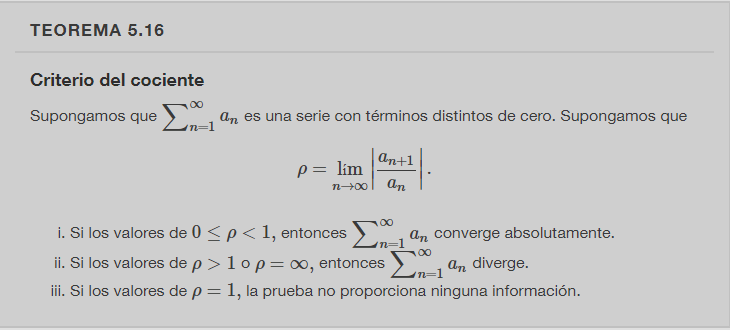

In [ ]:
#en primer lugar, vamos a analizar la convergencia de la serie, usando el criterio del cociente, considerando un valor de n suficientemente grande

n= 1000000

ρ_1= abs(s_n_1(n)[-1]/s_n_1(n)[-2])
ρ_2= abs(s_n_2(n)[-1]/s_n_2(n)[-2])
ρ_3= abs(s_n_3(n)[-1]/s_n_3(n)[-2])

print(f'ρ_1 = {ρ_1}')
print(f'ρ_2= {ρ_2}')
print(f'ρ_3 = {ρ_3}')

ρ_1 = 0.9999999999997501
ρ_2= 1.0004442470013328
ρ_3 = 1.0000020000025


De acuerdo con los resultados que se obtienen en la celda anterior, podemos considerar que cuando n tiende a infinito, el valor de $\rho$ es 1 para cada uno de los 3 casos, por lo cual el criterio del cociente no es concluyente.
Veamos si por el criterio del cociente podemos obtener alguna informacion acerca de la convergencia de la serie.

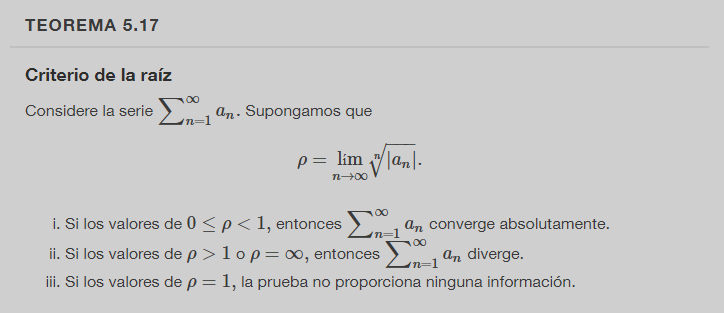

In [ ]:
n= 1000000

ρ_1= (s_n_1(n)[1]) ** (1/n)
ρ_2= (s_n_2(n)[1]) ** (1/n)
ρ_3= (s_n_3(n)[1]) ** (1/n)

print(f'ρ_1 = {ρ_1}')
print(f'ρ_2 = {ρ_2}')
print(f'ρ_3 = {ρ_3}')

ρ_1 = 0.9999999999995
ρ_2 = 0.9999709827502797
ρ_3 = 0.9999709831050212


Análogo a lo sucedido con el criterio anterior, cuando el valor de n aumenta, $\rho$ tiende a 1, por lo cual este criterio no es concluyente.

Vamos a utilizar criterios diferentes para el análisis de la convergencia de cada una de las series

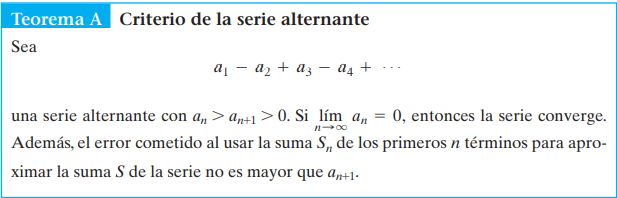

In [ ]:
#para la primera serie, vamos a verificar si se cumple el criterio de la serie alternante

n= 10000

abs(s_n_1(n)[-2]) > abs(s_n_1(n)[-1])

True

Notamos que se cumple el criterio de la serie alternante, entonces concluimos que la serie numero 1 converge.
Veamos ahora para la segunda:

Hasta el momento, con los métodos empleados hemos podido determinar la convergencia de la primera serie. 
Ahora, con fin de obtener un resultado de manera directa para cada una de las tres series, vamos a realizar gráficas que contengan el valor de la serie para diferentes n:

In [ ]:
def s_n_1(n):
  n_vect = np.arange(1, 2*n + 1)                       
  s_n = ((-1) ** n_vect * n_vect / (n_vect + 1) ).sum()
  return s_n

def s_n_2(n):
  n_vect = np.arange(1, n +1)
  term_1 = ((2 * n_vect - 1) / (2 * n_vect)).sum()
  term_2 = ((2 * n_vect) / (2 * n_vect + 1)).sum()
  s_n = -term_1 + term_2
  return s_n

def s_n_3(n):
  n_vect = np.arange(1, n+1)
  s_n = (1 / (2* n_vect * (2*n_vect + 1))).sum()
  return s_n

In [ ]:
x = np.arange(1, 1001)  #en el eje x vamos a considerar los términos del 1 al 1000

y_1 = np.array([s_n_1(i) for i in range(1,1001)])
y_2 = np.array([s_n_2(i) for i in range(1,1001)])
y_3 = np.array([s_n_3(i) for i in range(1,1001)])

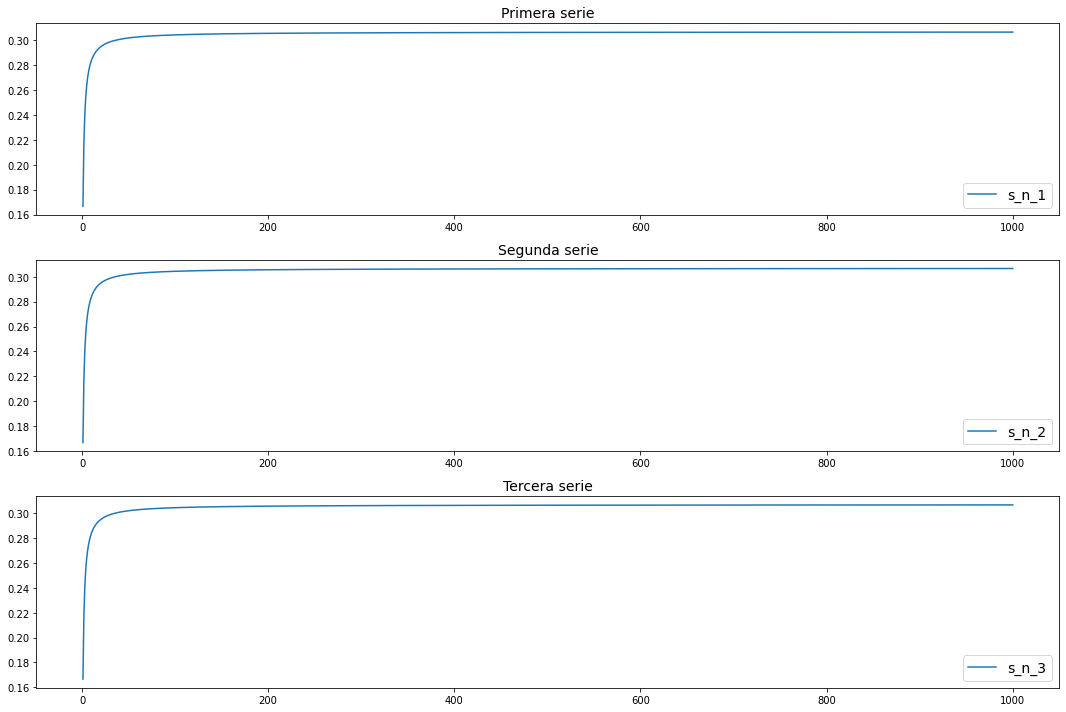

In [ ]:
#graficamos:

fig, axs = plt.subplots(3, 1, figsize=(15,10))

axs[0].plot(x, y_1, label='s_n_1')
axs[1].plot(x, y_2, label='s_n_2')
axs[2].plot(x, y_3, label='s_n_3')

axs[0].set_title('Primera serie', fontsize =14)
axs[1].set_title('Segunda serie', fontsize =14)
axs[2].set_title('Tercera serie', fontsize =14)

axs[0].legend(loc='best', fontsize=14)
axs[1].legend(loc='best', fontsize=14)
axs[2].legend(loc='best', fontsize=14)


fig.tight_layout()

In [ ]:
print(f'el valor de convergencia de la serie s_n_1 es aproximadamente {s_n_1(10000)}')
print(f'el valor de convergencia de la serie s_n_2 es aproximadamente {s_n_2(10000)}')
print(f'el valor de convergencia de la serie s_n_3 es aproximadamente {s_n_3(10000)}')

el valor de convergencia de la serie s_n_1 es aproximadamente 0.3068278213148705
el valor de convergencia de la serie s_n_2 es aproximadamente 0.30682782131407293
el valor de convergencia de la serie s_n_3 es aproximadamente 0.3068278213149296


- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función 
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.

In [ ]:
#definimos las funciones relacionadas con los errores

def E_1(N):
  E = abs((s_n_1(N) - s_n_3(N)) / s_n_3(N))
  return E

def E_2(N):
  E = abs((s_n_2(N) - s_n_3(N)) / s_n_3(N))
  return E


In [ ]:
#lo hago de esta forma para tomar solo 100 valores entre 10^0 y 10^6

n = np.logspace(0, 6, 100)    #se utiliza para crear una secuencia de números equiespaciados en una escala logarítmica
e_1 = np.array([E_1(i) for i in n])
e_2 = np.array([E_2(i) for i in n])

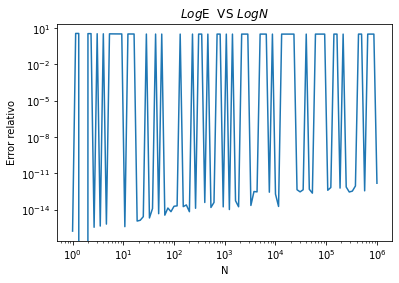

In [ ]:
plt.loglog(n, e_1)
plt.xlabel('N')
plt.ylabel('Error relativo')
plt.title('$Log$E  VS $LogN$');

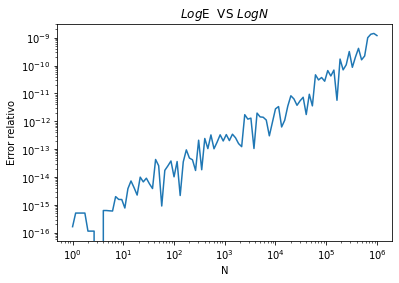

In [ ]:
plt.loglog(n,e_2)
plt.xlabel('N')
plt.ylabel('Error relativo')
plt.title('$Log$E  VS $LogN$');

- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página 
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)


En principio, considerando que las tres expresiones corresponden matemáticamente a la misma serie, se esperaría que los resultados en los tres casos fuesen los mismos, sin embargo, por diferentes errores asociados a la máquina, podemos observar que existen ciertas diferencias cuando se analizan los resultados correspondientes a cada una de las tres expresiones.

Cuando se compara la funcion 3 con la 1, se nota que el error relativo depende de los valores de n que se consideren, sin embargo, no se observa un patrón concreto, pues por intervalos aumenta o disminuye el error.

Ahora bien, cuando se compara con la segunda función, es posible notar que a medida que crecen los valores de n, la diferencia también aumenta (de manera global), sin embargo, también hay intervalos en los cuales el error disminuye un poco.

De acuerdo con lo que se menciona en el libro, las regiones de la gráfica en las cuales se presentan lineas rectas, significan que en error es proporcional a algunas potencias de N, lo cual se evidencia por tramos en cada una de las dos gráficas anteriores.